# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
# when I failed to install a package use pip, try conda install!! That's how I installed ggplot successfully.
import requests
import requests_cache
import requests_ftp
import lxml
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
from urlparse import urlunparse, urlparse
import pandas as pd
plt.style.use('ggplot')
requests_cache.install_cache('cache') #????????? why use coll_cache instead of cache
%matplotlib inline       
#???????????????
#requests_cache.install_cache("cache")


In [2]:
def url_lxml(url,page):
    """
    input: url and page
    output: lxml of this website
    """
    response = requests.get(url+'/page/{}'.format(page))
    html = response.text  # xxx.text  ->  extract the text
    # this part if I run aggie = BeautifulSoup(aggiehtml,"lxml-xml"); aggie.prettify() is very short. Why???
    return BeautifulSoup(html,"lxml")

In [536]:
#url = "https://theaggie.org/"
#params = {"groups":"NEWS","page":1}
def link_art(url,page):
    """
    input: url and page
    output: links for the articles in each article lists
    """
    #response = requests.get(url)
    #html = response.text
    #aggie = BeautifulSoup(html,"lxml")
    #agglist_content = aggie.find_all(name="a",attrs={"itemprop":"name"})
    #aggie article list url: get the url for each article list
    #list_url = [x["href"]for x in agglist_content]
    all_links = []
    #for lists in list_url:
    article = url_lxml(url,page)
    art_content = article.find_all(name="h2",attrs={"class":"entry-title"})
        # there are some in a that don't have href attrs
    for art in art_content:
        try:                # use xxx.a gose down to a tag a directly 
            all_links.append(art.a["href"])
        except TypeError:
            None       
    return all_links

In [465]:
link_art("https://theaggie.org/campus",6)

['https://theaggie.org/2016/11/29/advocacy-groups-write-letters-to-uc-president-amid-concerns-of-anti-semitism/',
 'https://theaggie.org/2016/11/29/student-health-and-counseling-services-launches-nap-campaign/',
 'https://theaggie.org/2016/11/28/uc-davis-receives-760-million-for-research/',
 'https://theaggie.org/2016/11/27/two-sexual-assault-occurrences-reported-during-fall-quarter/',
 'https://theaggie.org/2016/11/27/this-week-in-senate-32/',
 'https://theaggie.org/2016/11/22/the-life-of-former-chancellor-linda-p-b-katehi-post-resignation/',
 'https://theaggie.org/2016/11/21/uc-davis-releases-2015-2016-annual-campus-travel-survey-results/',
 'https://theaggie.org/2016/11/21/plant-and-animal-sciences-at-uc-davis-rank-number-one-in-the-world/',
 'https://theaggie.org/2016/11/20/achieve-uc-program-encourages-students-to-apply-to-ucs/',
 'https://theaggie.org/2016/11/20/uc-transfer-application-deadline-extended/',
 'https://theaggie.org/2016/11/18/anti-diversity-posters-discovered-on-cam

In [466]:
link_art("https://theaggie.org/city",6)

['https://theaggie.org/2016/10/09/downtown-davis-receives-artsy-public-pianos/',
 'https://theaggie.org/2016/10/07/hopeful-hyatt-house-hotel-denied-approval-by-planning-commission/',
 'https://theaggie.org/2016/10/04/police-logs/',
 'https://theaggie.org/2016/09/27/davis-farmers-market-hits-the-stands-for-its-40th-year/',
 'https://theaggie.org/2016/09/22/bike-city-usa/',
 'https://theaggie.org/2016/06/03/wakeboarding-team-breaks-guinness-world-record-in-woodland/',
 'https://theaggie.org/2016/06/03/davis-city-council-recognizes-social-justice-advocates/',
 'https://theaggie.org/2016/06/02/clintons-cover-california-from-north-to-south/',
 'https://theaggie.org/2016/06/02/come-for-the-beer-stay-for-the-cause-at-davis-beer-and-cider-festival/',
 'https://theaggie.org/2016/06/02/sacramento-black-book-fair-kicks-off-june-3/',
 'https://theaggie.org/2016/06/02/10-events-happening-in-and-around-davis-this-summer/',
 'https://theaggie.org/2016/06/01/davis-arts-center-presents-june-pop-up-seri

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [537]:
# ???????when should I ues .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 }) ???????
# type of author[0].b.text is unicode
# use unicodedata package to transform unicode type into string
import unicodedata
import re
def extra_content(url):  # in the website Inspector there is  ::before   what's the meaning of this??
    """
    input: url
    output: dictionary with author, text, title and url
    """
    # parse to lxml
    alllxml = url_lxml(url,1)
    # create a dictionary
    adict = {"author":[],"text":[],"title":[],"url":[]}
    #alllxml = url_lxml(test_art[0],1)
    # title
    titlelxml = alllxml.find_all(name="h1",attrs={"class":"entry-title","itemprop":"headline"})
    try:
        title = titlelxml[0].text.strip().encode('ascii','ignore')
    except IndexError:
        title = None
    adict["title"]=title
    # texts
    textlxml = alllxml.find_all("p")
    texts1 = [x.text.strip().encode('ascii','ignore') for x in textlxml]
    # author is not always in the last row. Most of the time it is the 2nd last row
    # xx[-1]: the last one; xx[:-1]: balabala untill the 2nd last one
    # all the text content
    adict["text"]="".join(texts1[:-2])
    # extract the author
    # use regular expression  "\s" is space. {n} means repeat n times. {1,3} means repeat 1 or 2 or 3 times
    try:
        author = re.search(".*:\s*([a-zA-Z -]+)\s.*@",texts1[-2]).group(1)
    except AttributeError:
        try:
            author = re.search(".*:\s*([a-zA-Z -]+)\s.*@",texts1[-1]).group(1)
        except AttributeError:
            author = None
    adict["author"]= author
    adict["url"] = url
    return adict

In [227]:
extra_content('https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/')

{'author': 'Bianca Antunez',
 'text': 'Davis residents create financial model to make citys financial state more transparentTo increase transparency between the citys financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design.Jeff Miller and Matt Williams, who are members of Davis Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager.City staff appreciate the efforts that have gone into this, and the interest in trying to look at the citys potential financial position over the long term, Stachowicz said in an email interview. We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [538]:
# each page there are 15 articles. we need 4 pages to get 60 articles
# add column as category. 
# get the link, output are multiple links
def create_df(news_link):                  # page 1-4
    """
    input: url links
    output: datafrmae of articles contents in 4 links (page 1-4)
    """
    all_link = [link_art(news_link,page) for page in range(1,5)]
    news = []
    for links in all_link:
        news_art = [extra_content(link) for link in links]
        news.append(news_art)
    return pd.concat([pd.DataFrame(new) for new in news])    
camp_df = create_df('https://theaggie.org/campus')
city_df = create_df('https://theaggie.org/city')

In [3]:
range(1,5)

[1, 2, 3, 4]

In [240]:
print city_df.shape
print camp_df.shape

(60, 4)
(60, 4)


In [539]:
news_df = pd.concat([camp_df,city_df])

In [540]:
# simply use "+" to adding elements in the same list without creating nested lists
category = ["campus"]*60 + ["city"]*60
news_df["category"] = category
# reset the index value
news_df = news_df.set_index([range(120)])

In [280]:
news_df

,author,text,title,url,category
0,Alyssa Vandenberg,"Six senators, new executive team electedCurren...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...,campus
1,Aaron Liss and Raul Castellanos,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...,campus
2,Kimia Akbari,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...,campus
3,Kenton Goldsby,Opening date pushed back to May 1Students have...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...,campus
4,Ivan Valenzuela,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...,campus
5,Alyssa Vandenberg,"Shaheens name to remain on ballot, his votes w...",Senate candidate Zaki Shaheen withdraws from race,https://theaggie.org/2017/02/22/senate-candida...,campus
6,Aaron Liss,Students receive email warnings from UC Davis ...,UC Davis experiences several recent hate-based...,https://theaggie.org/2017/02/21/uc-davis-exper...,campus
7,Alyssa Vandenberg,UC Board of Regents to vote on the appointment...,UC President selects Gary May as new UC Davis ...,https://theaggie.org/2017/02/21/uc-president-s...,campus
8,Jeanna Totah,Tighter policies require greater approval of o...,Katehi controversy prompts decline of UC admin...,https://theaggie.org/2017/02/20/katehi-controv...,campus
9,Ivan Valenzuela,SR #7 asks university to increase capacity for...,ASUCD Senate passes resolution submitting comm...,https://theaggie.org/2017/02/20/asucd-senate-p...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [541]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [542]:
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [1]:
textd = {} #dictionary from lemmata to document ids containing that lemma
textall=[]
for art in range(120):
    textall.append("".join(news_df.get_value(art,col="text"))) # get the text content
    d = news_df.get_value(art,col="title") 
    t = news_df.get_value(art,col="text")
    s = set(lemmatize(t))
    try: # by using toks | s, toks will combine elements of toks in the last iteration. Can I also use +?????
        toks = toks | s
    except NameError: # this is only used for the first iteration that no toks is created
        toks = s
    for tok in s:
        try: # lemmata : [title]
            textd[tok].append(d)
        except KeyError:
            textd[tok] = [d]
            
docids = {} #dictionary of the document id to an integer id for the document
N = 120  
for i in range(120):   # title : i
    docids[news_df.get_value(i,col="title")] = i
    
tokids = {} #dictionary of lemma to integer id for the lemma
tok_list = list(toks)  # a list of lemmata
m = len(tok_list) # the length of lemmata
for j in xrange(m):  # lemma : j
    tokids[tok_list[j]] = j    

NameError: name 'news_df' is not defined

In [544]:
# dictionary: lemma: number of documents this lemma occurs 
numd = {key:len(set(val)) for key,val in textd.items()}

logN = np.log(120)
# lemma : its smoothed idf
idf_smooth = {key:logN - np.log(1 + val) for key, val in numd.items() if val > 1}

In [302]:
idf_smooth

{'1,800': 3.6888794541139358,
 u'hatr': 3.401197381662155,
 'four': 2.3025850929940455,
 u'protest': 2.0149030205422647,
 'sleep': 3.6888794541139358,
 'asian': 3.401197381662155,
 'oldest': 3.6888794541139358,
 'hate': 2.2225423853205091,
 'whose': 3.1780538303479453,
 'saylor': 3.6888794541139358,
 'voter': 3.6888794541139358,
 u'bike': 2.7080502011022101,
 'under': 1.7429693050586228,
 '@': 3.401197381662155,
 u'everi': 1.6094379124341001,
 'risk': 2.7080502011022101,
 u'compassion': 3.6888794541139358,
 'blanket': 3.6888794541139358,
 u'rise': 3.1780538303479453,
 u'years.th': 3.6888794541139358,
 u'voic': 2.4849066497879999,
 u'tenni': 3.6888794541139358,
 'jack': 3.6888794541139358,
 u'unitran': 3.6888794541139358,
 u'govern': 2.0149030205422647,
 'jacob': 3.6888794541139358,
 'affect': 1.9542783987258296,
 u'school': 1.2611312181658842,
 u'scholar': 2.9957322735539909,
 u'later.th': 3.6888794541139358,
 u'showcas': 3.6888794541139358,
 u'environmentally-friendli': 3.688879454113

(array([  17.,   10.,   18.,   16.,   19.,   27.,   35.,   49.,   65.,
          56.,  104.,   86.,  147.,   77.,  205.,  131.,  179.,  252.,
         341.,  781.]),
 array([-0.0082988 ,  0.17656011,  0.36141902,  0.54627794,  0.73113685,
         0.91599576,  1.10085467,  1.28571359,  1.4705725 ,  1.65543141,
         1.84029033,  2.02514924,  2.21000815,  2.39486706,  2.57972598,
         2.76458489,  2.9494438 ,  3.13430272,  3.31916163,  3.50402054,
         3.68887945]),
 <a list of 20 Patch objects>)

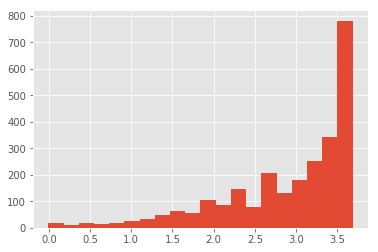

In [303]:
plt.hist(idf_smooth.values(),bins=20)

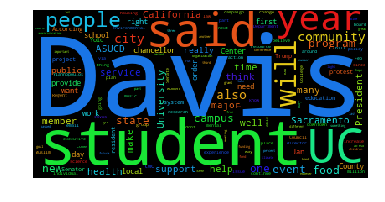

In [545]:
from os import path
from wordcloud import WordCloud
# all
wordcloud = WordCloud().generate("".join(textall))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

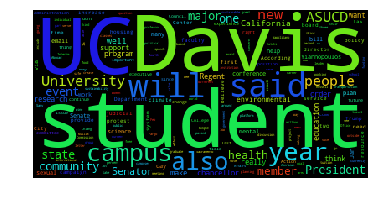

In [380]:
# for the campus news
wordcloud = WordCloud().generate("".join(textall[:59]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

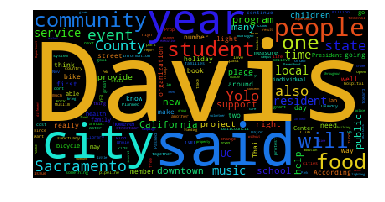

In [382]:
# for the city
wordcloud = WordCloud().generate("".join(textall[59:119]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<p> From the previous three plots we know that the key words for all the articles are "Davis", "UC", "student", "community", "people" and "city". <br>
For the articles in campus news, the key words are "UC", "student", "Davis" and "campus".<br>
For the articles in city news, the key words are "Davis", "city", "coummunity", "people", "food", "student" amd "Sacramento". <br> Thus there is no big difference of the main topics in campus news and city news.</p>

In [546]:
# the previous parts are only for calculating inverse document frequency
# now we want to know the idf with tf(t,d) weighted
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
# textall is a list of raw files
tfs = vectorizer.fit_transform(textall)

In [547]:
sim = tfs.dot(tfs.T)

In [548]:
sim.mean()

1547.5883685507699

In [549]:
# Find the smallest value
# in-place: update the original string instead of creating a new one
# convert the sparse matrix to a np.array by using .toarray() . And then I can use np.where(sim == sim.max()) to find the index of the max value
simay = sim.toarray()
#np.where(simay == simay.max())
simay.shape

(120L, 120L)

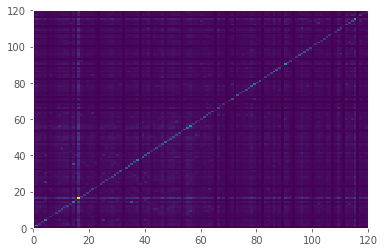

In [550]:
import numpy as np
#plt.imshow(simay, cmap='hot', interpolation='nearest')
plt.pcolor(simay)
plt.show()
# extract the upper diagonal
#simay_upp = np.triu(simay,k=0)

<p> From the heatmap above we can know that documentID 16 has more similarity with other documents 

In [595]:
# tranfer into 1D array, the order of it is row by row
#simay_upp1 = np.reshape(simay,(1,np.product(simay.shape)))
#simay_upp1

simay_upp = np.triu(simay,k=1) # k=1 make all the diagonal elements equal to 0
# order it to find the largest ones
def sim_art(n):   # get the index of sorted data
    flat = simay_upp.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    loc = np.unravel_index(indices, simay.shape)
    print [docids.keys()[docids.values().index(loc[0][n-1])], loc[0][n-1]]
    print [docids.keys()[docids.values().index(loc[1][n-1])], loc[1][n-1]]

In [571]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""  # take a look at argpartition !!!!
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

In [596]:
# the most similar one
sim_art(1)

['UC Davis holds first mental health conference', 14]
['UC Davis to host first ever mental health conference', 35]


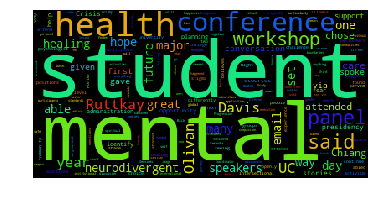

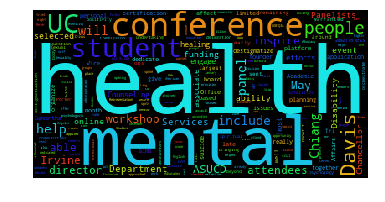

In [597]:
#show the similarity of this two articles
wordcloud = WordCloud().generate("".join(textall[14]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud = WordCloud().generate("".join(textall[35]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<p> From the plot above we know that the most similar articles are "UC Davis holds first mental health conference" and "UC Davis to host first ever mental health conference". The common words are "mental", "health", "student" and "conference".</p>

In [598]:
# the 2nd similar one
sim_art(2)

['UC Davis holds first mental health conference', 14]
['2017 ASUCD Winter Elections  Meet the Candidates', 16]


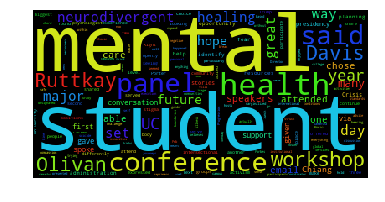

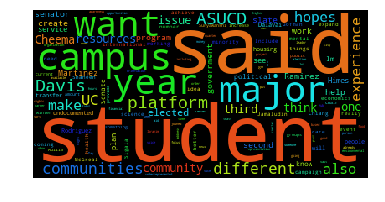

In [599]:
#show the similarity of this two articles
wordcloud = WordCloud().generate("".join(textall[14]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud = WordCloud().generate("".join(textall[16]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<p> From the plot above we know that the 2nd most similar articles are 'UC Davis holds first mental health conference' and '2017 ASUCD Winter Elections  Meet the Candidates'. The common words are "student" and "year". 

In [600]:
# the 3rd similar one
sim_art(3)

['2017 ASUCD Winter Elections  Meet the Candidates', 16]
['Nov. 8 2016: An Election Day many may never forget', 115]


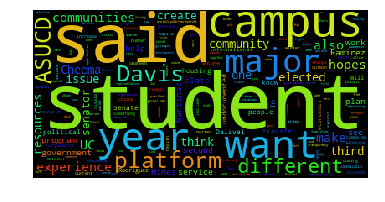

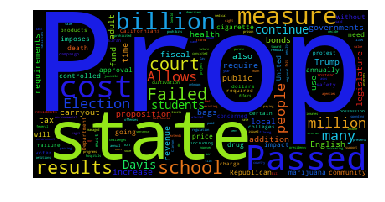

In [601]:
wordcloud = WordCloud().generate("".join(textall[16]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud = WordCloud().generate("".join(textall[115]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<p> From the plot above we know that the 3rd similar articles are '2017 ASUCD Winter Elections  Meet the Candidates' and 'Nov. 8 2016: An Election Day many may never forget'. The reason they are similar is because both two articles are about election and government.</p>

<p> For the last question. I assume that this corpus is the 16th article. By comparing the wordcloud of overall the aggie corpus with the wordcloud of the 16th corpus, we can know that they have some common words like "student", "community" and "davis". Thus I think it is representitive for the aggie.</p>